Decoding Stimulus a Neural Activity Dataset with a Support Vector Machine 
Author: Katherine Shakman

# Goal: Decode stimulus type from activity 2 neurons 

### We are going to train a classifier to output the stimulus (0 for a chemosensory stimulus, 1 for a flashing light) given an input of a 1x200 matrix of ordered values (two vectors appended one after the other) that represent the activity levels of two neurons over a period of time that includes the stimulus presentation.  

In [24]:
import numpy as np
import pandas as pd
import scipy
import scipy.io as spio
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the light data as a dataframe

In [25]:
dfL = pd.read_excel('light_chrGeno_BthenAtraces.xlsx',sheet_name=0)
dfL[0:3]

,fly1,fly2,fly3,fly5,fly6
0,0.481751,-0.351541,-0.181905,0.241106,0.336005
1,0.539349,-0.350023,0.108446,0.139394,1.456428
2,1.076478,-0.461372,0.172692,-0.007123,0.955638


# Load the chemosensory stimulus data as a dataframe

In [26]:
dfB = pd.read_excel('chem_chrGeno_BthenAtraces.xlsx',sheet_name=0)
dfB[0:3]

,fly1,fly2,fly3,fly5,fly6
0,-0.842432,-1.091211,0.250048,-0.217688,2.448144
1,-0.496674,0.526013,-0.211908,-0.490600,2.180330
2,-0.032417,0.337636,-0.051828,-0.053354,1.119374


# Join the dataframes

In [27]:
frames = [dfL, dfB]
dfAll = pd.concat(frames,axis=1)
dfAll[0:3]

,fly1,fly2,fly3,fly5,fly6,fly1,fly2,fly3,fly5,fly6
0,0.481751,-0.351541,-0.181905,0.241106,0.336005,-0.842432,-1.091211,0.250048,-0.217688,2.448144
1,0.539349,-0.350023,0.108446,0.139394,1.456428,-0.496674,0.526013,-0.211908,-0.490600,2.180330
2,1.076478,-0.461372,0.172692,-0.007123,0.955638,-0.032417,0.337636,-0.051828,-0.053354,1.119374


In [28]:
# Prepare df for the classifier
X = dfAll.transpose()
# Get labels for the classifier 
y = [0,0,0,0,0,1,1,1,1,1]

# Split into training and test sets 

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=41)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=43)

# Train SVM Classifier

In [7]:
clf1 = SVC()
clf1.fit(X_train1, y_train1) 

clf2 = SVC()
clf2.fit(X_train2,y_train2)

clf3 = SVC()
clf3.fit(X_train3,y_train3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
out1 = clf1.predict(X_test1)
out2 = clf2.predict(X_test2)
out3 = clf3.predict(X_test3)
score1 = clf1.score(X_test1,y_test1)
score2 = clf2.score(X_test2,y_test2)
score3 = clf3.score(X_test3,y_test3)
predictions = [list(out1)+list(out2)+list(out3)]
predictions = predictions[0]
scores = [score1,score2,score3]
labels = [y_test1+y_test2+y_test3]
labels = labels[0]
print('predictions:',predictions)
print('labels:',labels)
print('scores:',scores)
print('average score:',np.mean(scores))


predictions: [0, 1, 1, 0, 0, 1]
labels: [1, 1, 1, 0, 0, 1]
scores: [0.5, 1.0, 1.0]
average score: 0.833333333333


In [10]:
cm=confusion_matrix(labels, predictions)

Confusion matrix, without normalization
[[2 0]
 [1 3]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.25  0.75]]


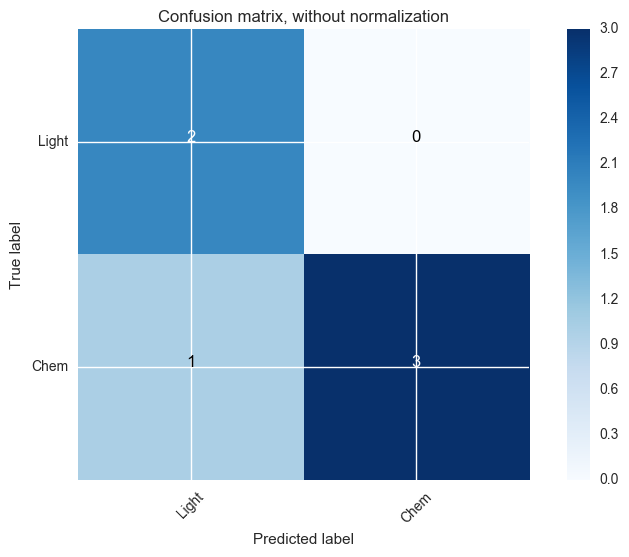

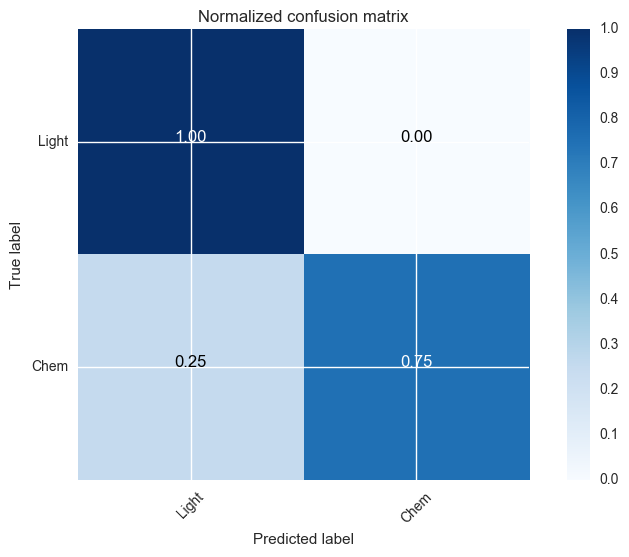

In [21]:
class_names = ['Light','Chem']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function is from the scikit-learn documentation. 
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# What does this mean? 
* The confusion matrix tells us, for each class/stimulus, how often the classifier predicted each label.  The top figure shows counts, and the bottom figure shows frequencies.  
* For the Light stimulus, the decoder output was correct 100% of the time (2/2).  
* For the Chem stimulus, the decoder output was correct 75% of the time (3/4).  
* Even though this was a tiny dataset, the data was nicely separable into the two classes and the SVM classifier was able to output the correct stimulus most of the time.  